# 1. Set enviroment

In [1]:
# Select an interactive backend for plotting
# check all the options by: %matplotlib -l
%matplotlib -l

# I prefer to choose qt5 which will pop up a new window for each plot. 
# Here, for inline presentation, I choose nbagg.
%matplotlib nbagg
# %matplotlib qt5 

# Reload all modules everytime before executing the Python code typed. 
# Sometimes it didnot work. I will reload the script manually by 'reload(pe)'
%load_ext autoreload
%autoreload 2

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [2]:
import matplotlib.pylab as plt
import numpy as np
import os, glob, sys
from copy import deepcopy
sys.path.append('/Users/your_user_name/your_folder_for_scripts')
import process_EELS as pe
from importlib import reload
import json

# 2. Load data

In [3]:
# Set the folder where your data is.
folder = '/Users/your_user_name/your_folder_for_data'

# Get all the file names in the folder with a npy format. (I will save SI data in the numpy files.)
# You can change the loading function based on the file format only if the final outputs are numpy arrays.
os.chdir(folder)
file_names = sorted(glob.glob('*.npy')) #'sorted' sorts into alphabetical order
file_names = file_names[:]
for i, f in enumerate(file_names):
    print('{}: {}'.format(i,f))

# Load data into data_list and metadata into metadata_list.
# We will need the metadata files to recontruct the x-axis of the spectra.
# Here, for nionswift, we have .json files as metadata files.
data_list = []
x_list = []
for file in file_names:
    data_list.append(np.load(folder+file))
    with open(folder + file[:-4] +'.json') as json_data:
        metadata = json.load(json_data)
        scale = metadata['spatial_calibrations'][2]['scale']
        offset = metadata['spatial_calibrations'][2]['offset']
        x_list.append(np.linspace(0, data_list[0].shape[2]-1, data_list[0].shape[2]) * scale + offset)

new_data_list = []
for i in range(len(data_list)):
    new_data_list.append([x_list[i], data_list[i]])

0: 1.npy
1: 1s.npy
2: 2.npy
3: 2s.npy
4: 3.npy
5: 3s.npy
6: data_substrate.npy
7: data_with_zlp.npy


# 3. Process Data

<IPython.core.display.Javascript object>


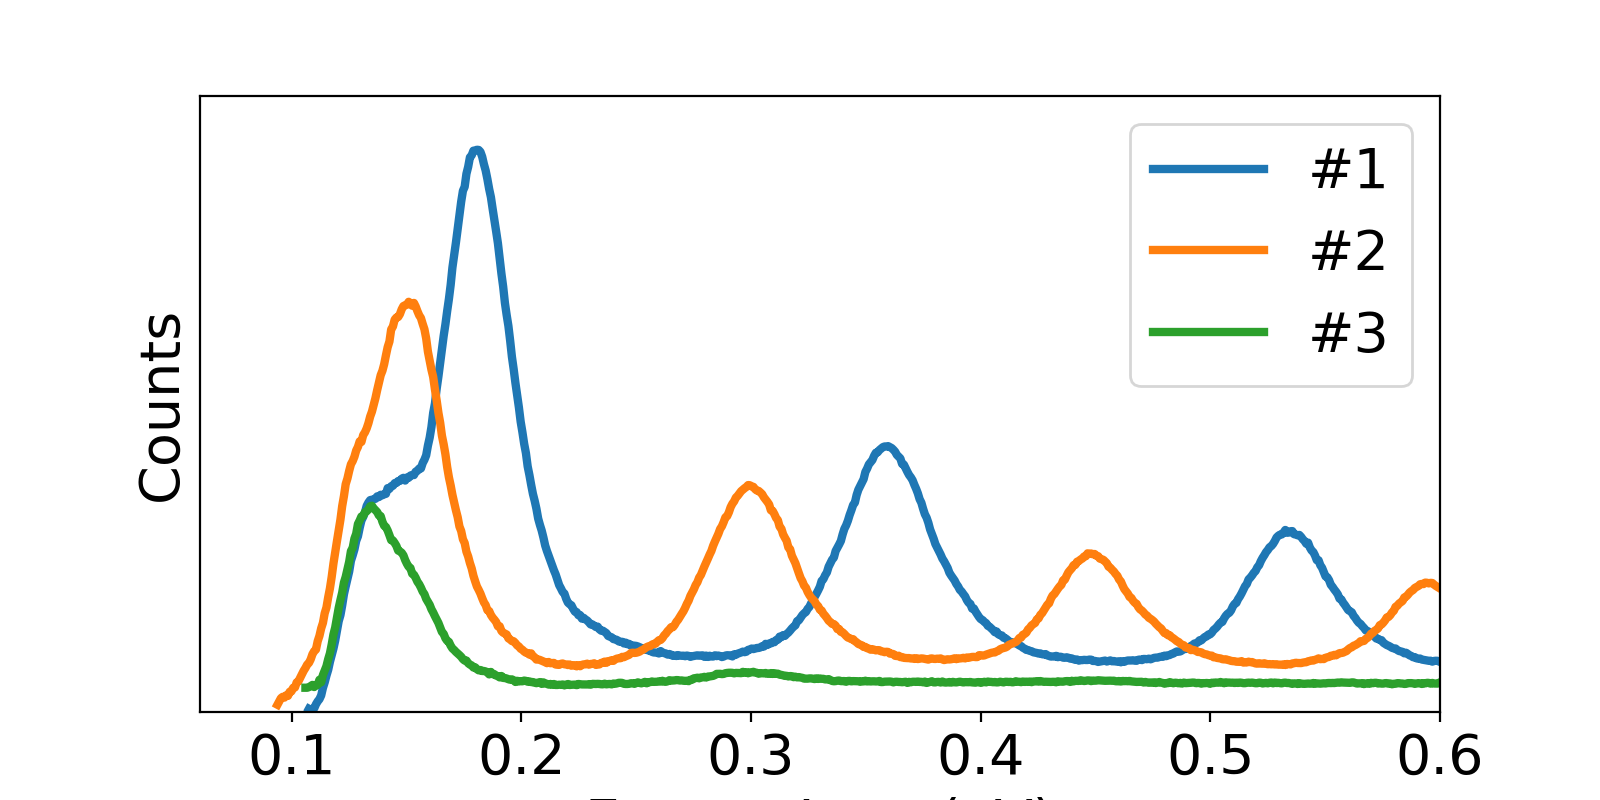

In [4]:
# Example Task 1: set parameters and plot raw data

reload(pe)

# set range to display and colors of lines
figsize = (8,4)
xrange = [0.06, 0.6] # range in x-axis to display 
prop_cycle = plt.rcParams['axes.prop_cycle'] # default colors
colors = prop_cycle.by_key()['color']
sel_list = [1,3,5] # select data to plot from all files
new_data = [new_data_list[i] for i in sel_list]
yshift_list = [0] * len(new_data) # shift in y-axis of each element for clarity
label_list = ['#1', '#2', '#3'] # Name of each element shown in figure
color_list = colors[:len(new_data)] # Color of each element in figure

config = {'figure_size' : [8,4],
          'xrange' : xrange,
          'yshift_list' : yshift_list,
          'label_list' : label_list,
          'color_list' : color_list}

reload(pe)
linefigure = pe.Lines()
linefigure.set_initial_elements([pe.Line(data, label_list[i]) for i, data in enumerate(new_data)])
linefigure.make_plot(config)

# Save
#plt.savefig('2.5um_3um_rod_sub.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


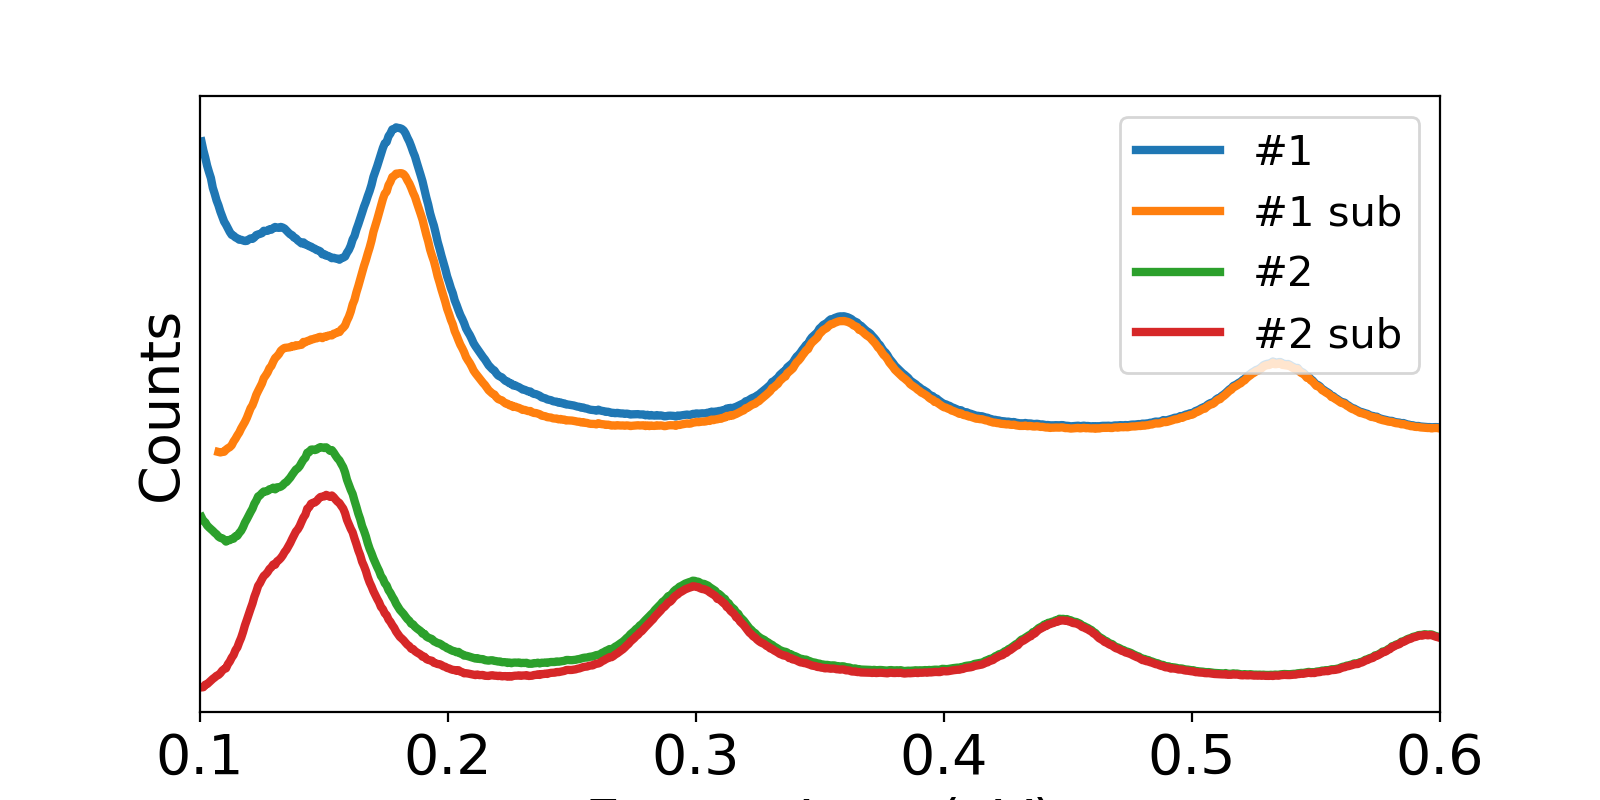

<IPython.core.display.Javascript object>


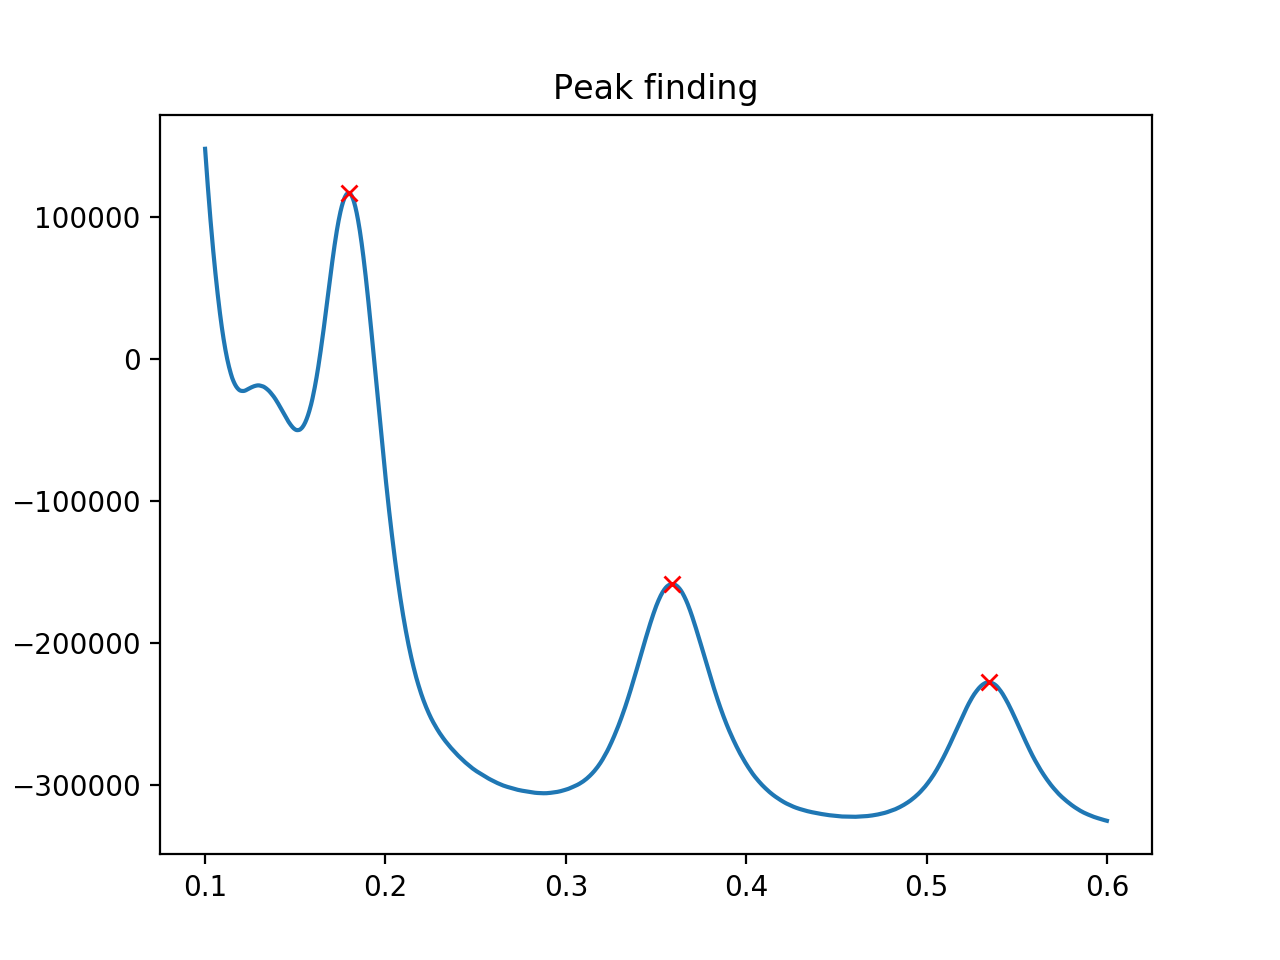

Peak positions for #1: [0.17953977 0.35912956 0.53446723]
Height #1: [ 117035.66695606 -158558.88444712 -227760.80439246]


<IPython.core.display.Javascript object>


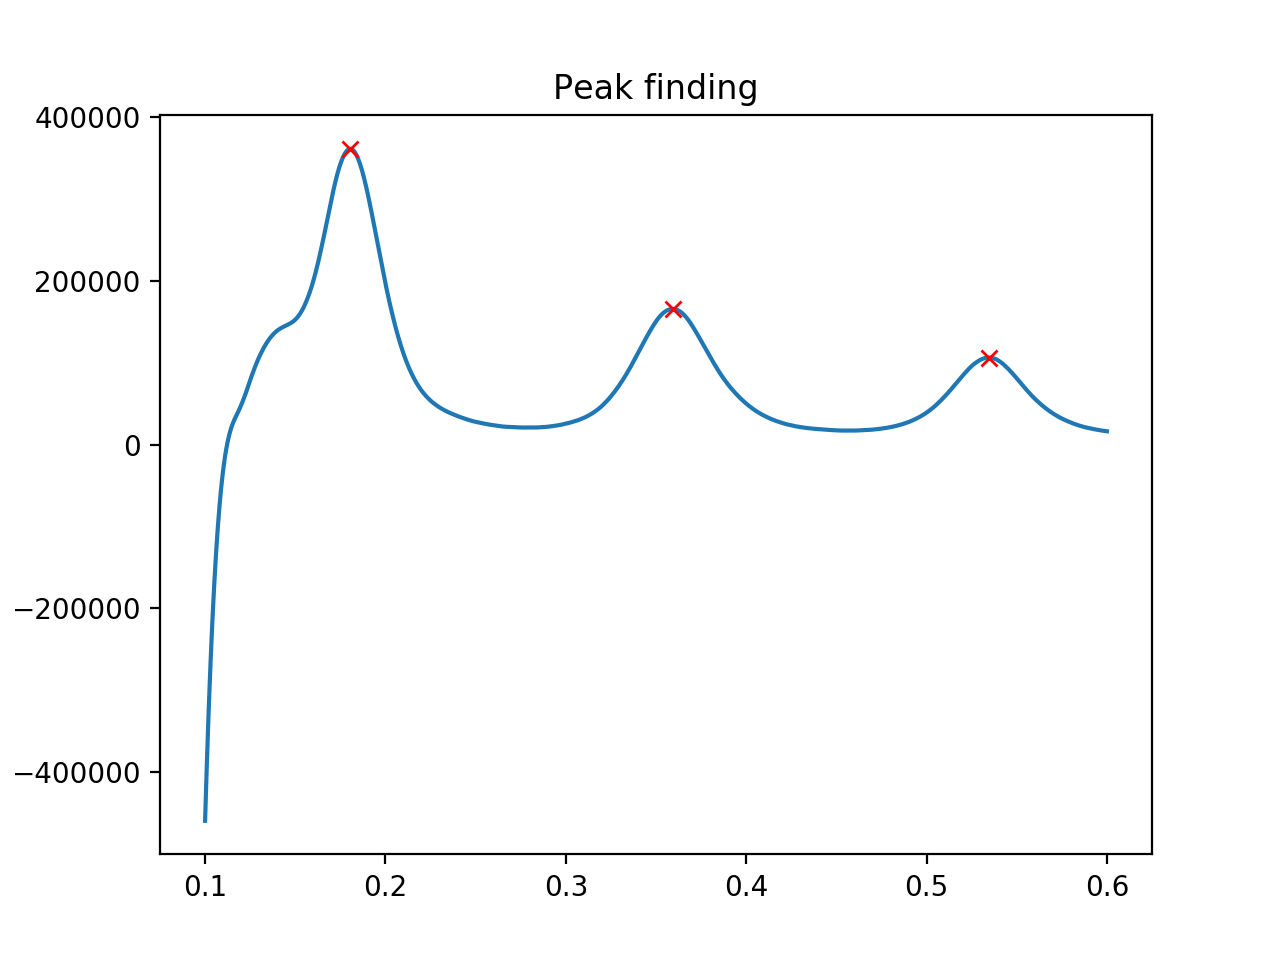

Peak positions for #1 sub: [0.18054027 0.35937969 0.53446723]
Height #1 sub: [360806.01638506 165396.36234424 106122.21133808]


<IPython.core.display.Javascript object>


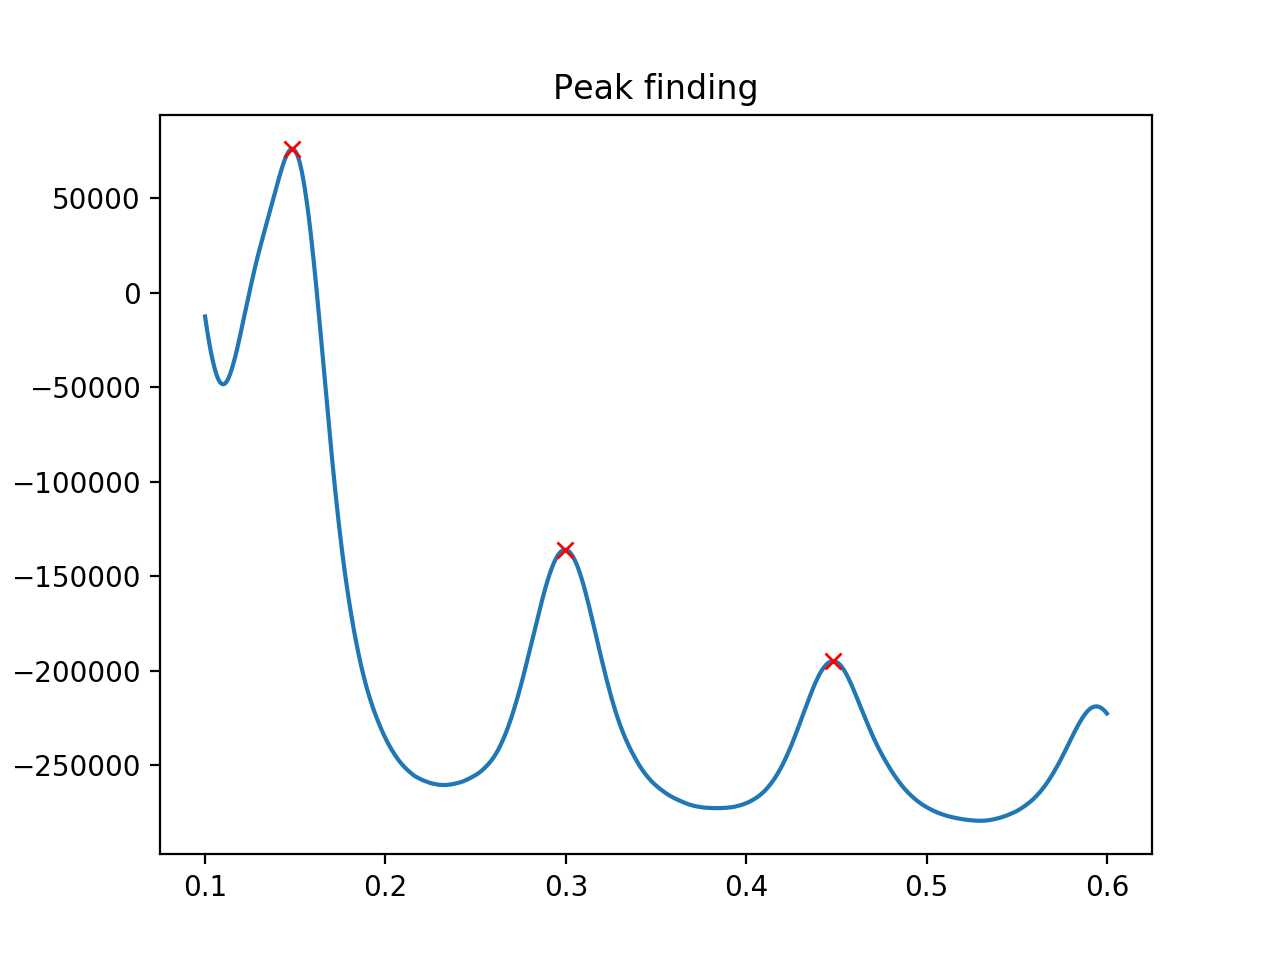

Peak positions for #2: [0.14827414 0.2995998  0.44817409]
Height #2: [  76090.54880687 -135999.80854749 -194809.33672889]


<IPython.core.display.Javascript object>


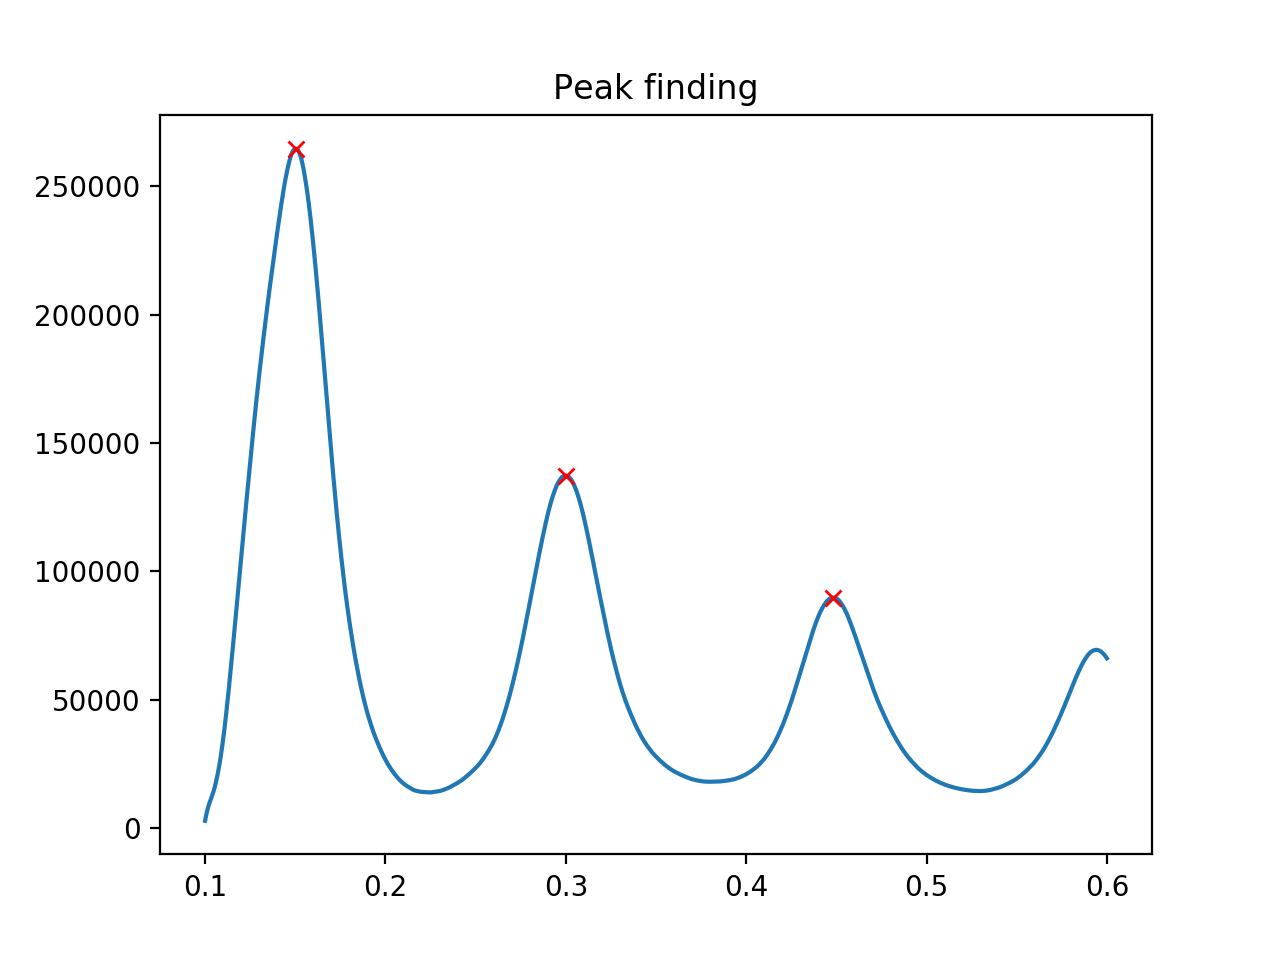

Peak positions for #2 sub: [0.15027514 0.30010005 0.44817409]
Height #2 sub: [264557.54331449 137318.75083244  89856.49348572]


In [5]:
# Example Task 2: set parameters, test the validation of manual ZLP subtraction and plot data
# Validation test can be performed by comparing the shifts of peaks before and after subtraction.

# set range to display and colors of lines
figsize = (8,4)
xrange = [0.1, 0.6]
prop_cycle = plt.rcParams['axes.prop_cycle'] # default colors
colors = prop_cycle.by_key()['color']
sel_list = list(range(4))
new_data = [new_data_list[i] for i in sel_list]
yshift_list = [0,0, -0.0015, -0.0015]
label_list = ['#1', '#1 sub', 
              '#2', '#2 sub',]
color_list = colors[:len(new_data)]

config = {'figure_size' : [8,4],
          'xrange' : xrange,
          'yshift_list' : yshift_list,
          'label_list' : label_list,
          'color_list' : color_list,
          'legend_fontsize' : 15
         }

reload(pe)
linefigure = pe.Lines()
linefigure.set_initial_elements([pe.Line(data, label_list[i]) for i, data in enumerate(new_data)])
linefigure.make_plot(config)
config_find_peak = {'distance': 1 / 100,
                  'prominence': 1 / 10,
                  'display_peaks': True,
                  }
linefigure.find_peak(xrange, config_find_peak)

# Save
#plt.savefig('2.5um_3um_rod_sub.png', bbox_inches='tight')

Peak positions for Raw: [0.36928464 0.4062031  0.42601301 0.46023012 0.49264632 0.54757379
 0.70335168 0.78169085 0.8132066  0.89424712 0.91945973 1.04192096
 1.17698849 1.2094047  1.23011506 1.26253127 1.35707854 1.46243122
 1.48134067 1.583992   1.6038019  1.62811406 1.66413207 1.69384692
 1.72266133 1.76408204 1.78929465 1.8172086  1.84602301 1.87933967
 1.91355678 1.93786893 1.981991  ]
Height Raw: [-69117.48385614 -69694.59815143 -70031.71351545 -70455.75980576
 -70905.14539418 -72595.57370448 -64407.38839327 -72190.0462668
 -73140.11391964 -75526.56696887 -75980.15266845 -69993.62747678
 -77644.03852977 -78453.76268704 -78570.62033642 -78813.37241835
 -76151.58724953 -74752.3290235  -74474.72279691 -79433.65165244
 -79476.149507   -79445.54900028 -78893.57514612 -78861.82662405
 -79315.91356555 -80153.23170489 -80518.5633738  -80845.35287058
 -81135.16503306 -81238.44815241 -81885.87252073 -82149.50868166
 -82697.16455611]


<IPython.core.display.Javascript object>


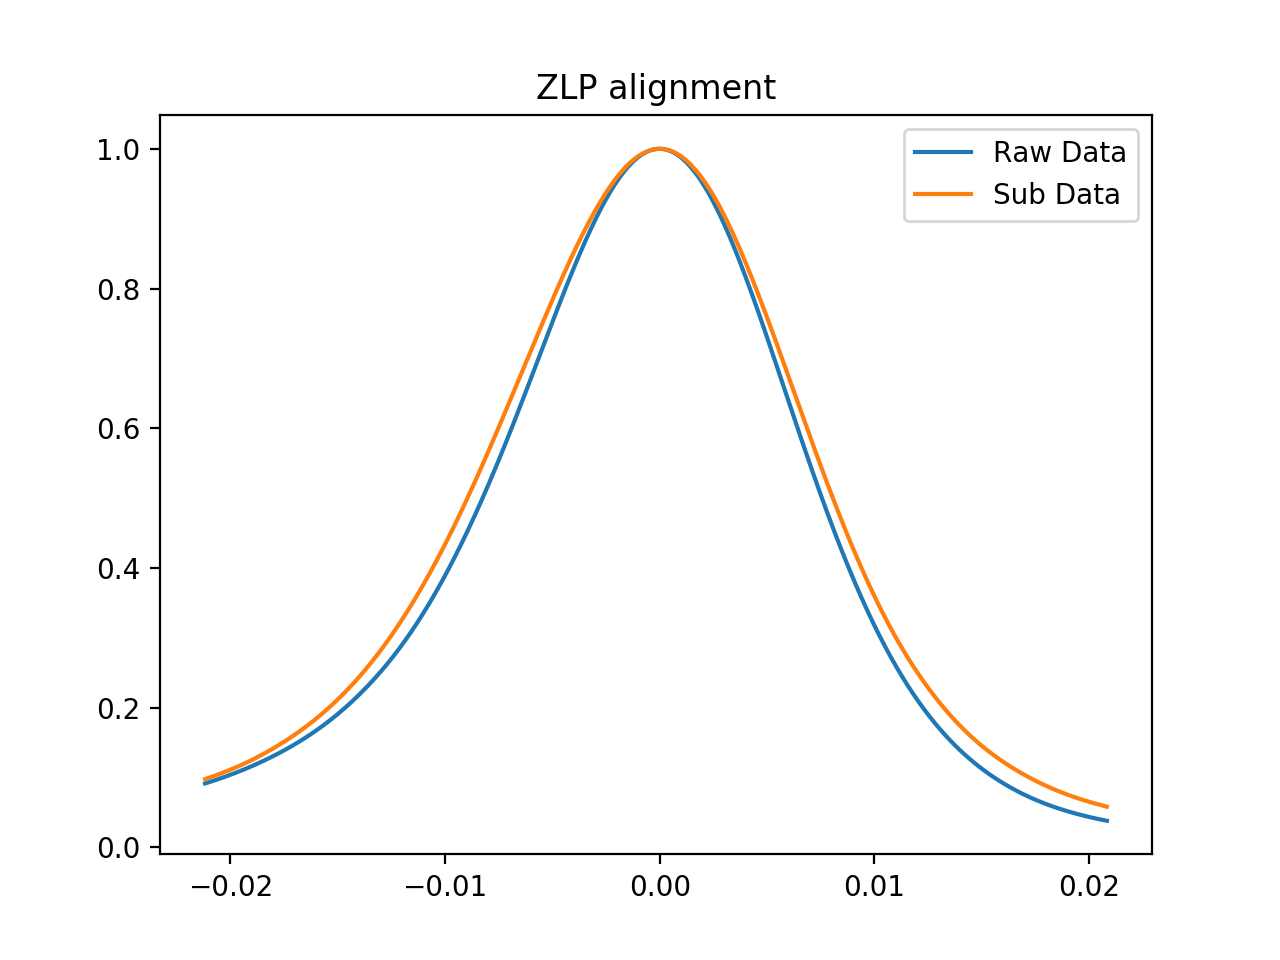

<IPython.core.display.Javascript object>


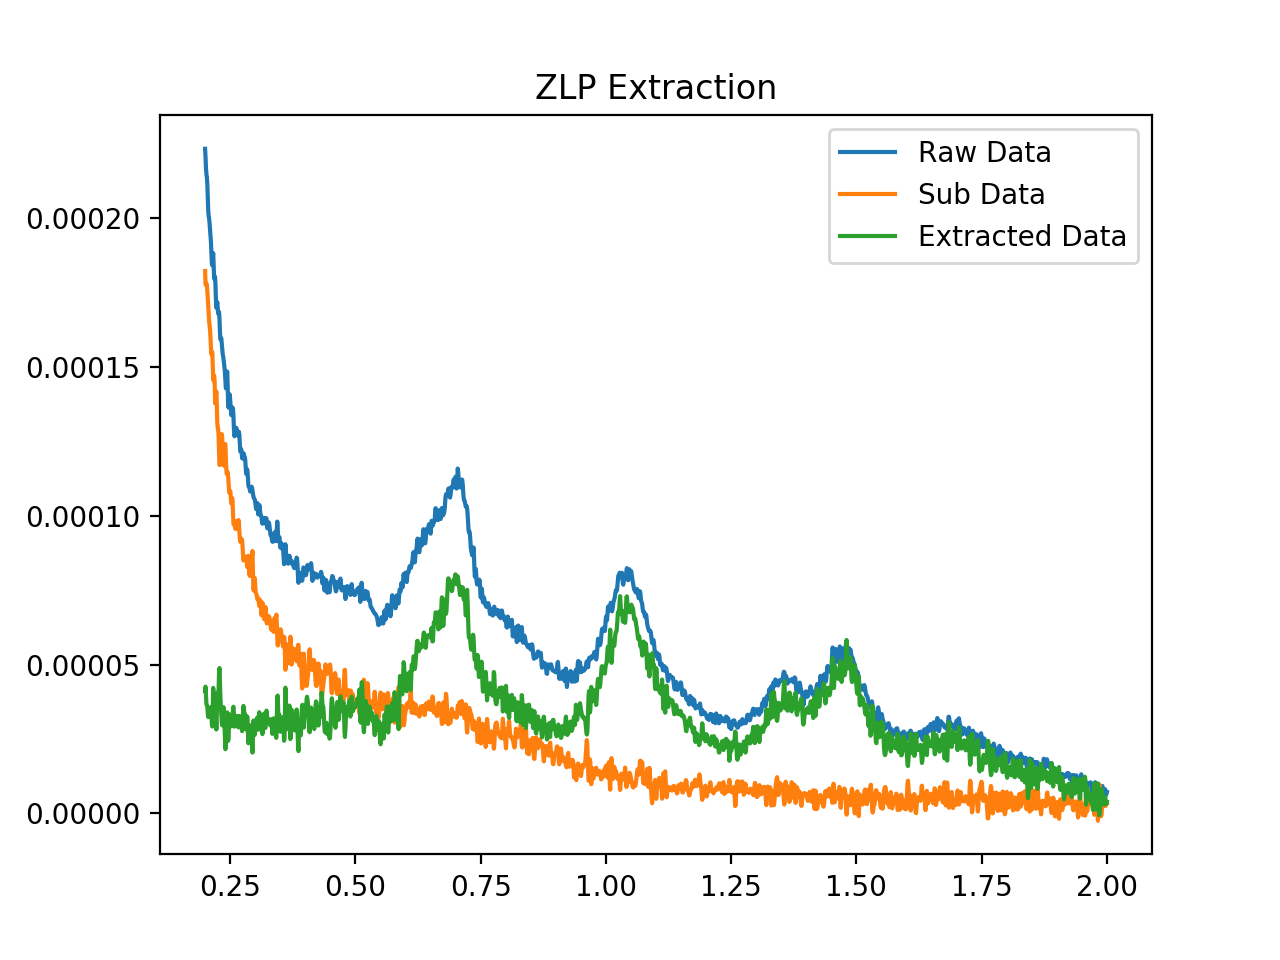

After subtraction:


<IPython.core.display.Javascript object>


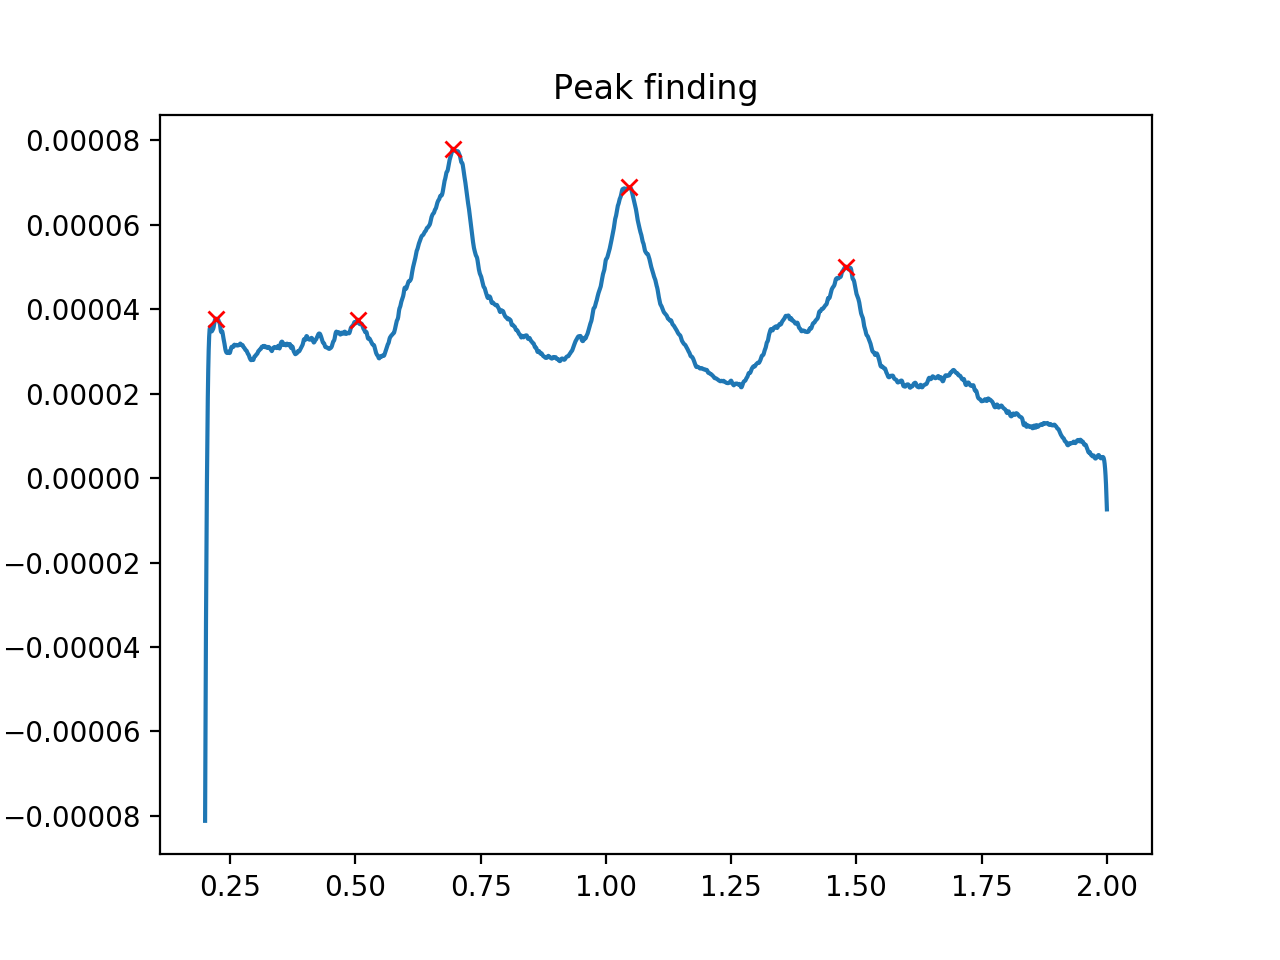

Peak positions for Raw Subtracted: [0.22161081 0.50435218 0.69524762 1.04552276 1.47863932]
Height Raw Subtracted: [3.77867272e-05 3.75159472e-05 7.80153525e-05 6.88985989e-05
 5.01149013e-05]


<IPython.core.display.Javascript object>


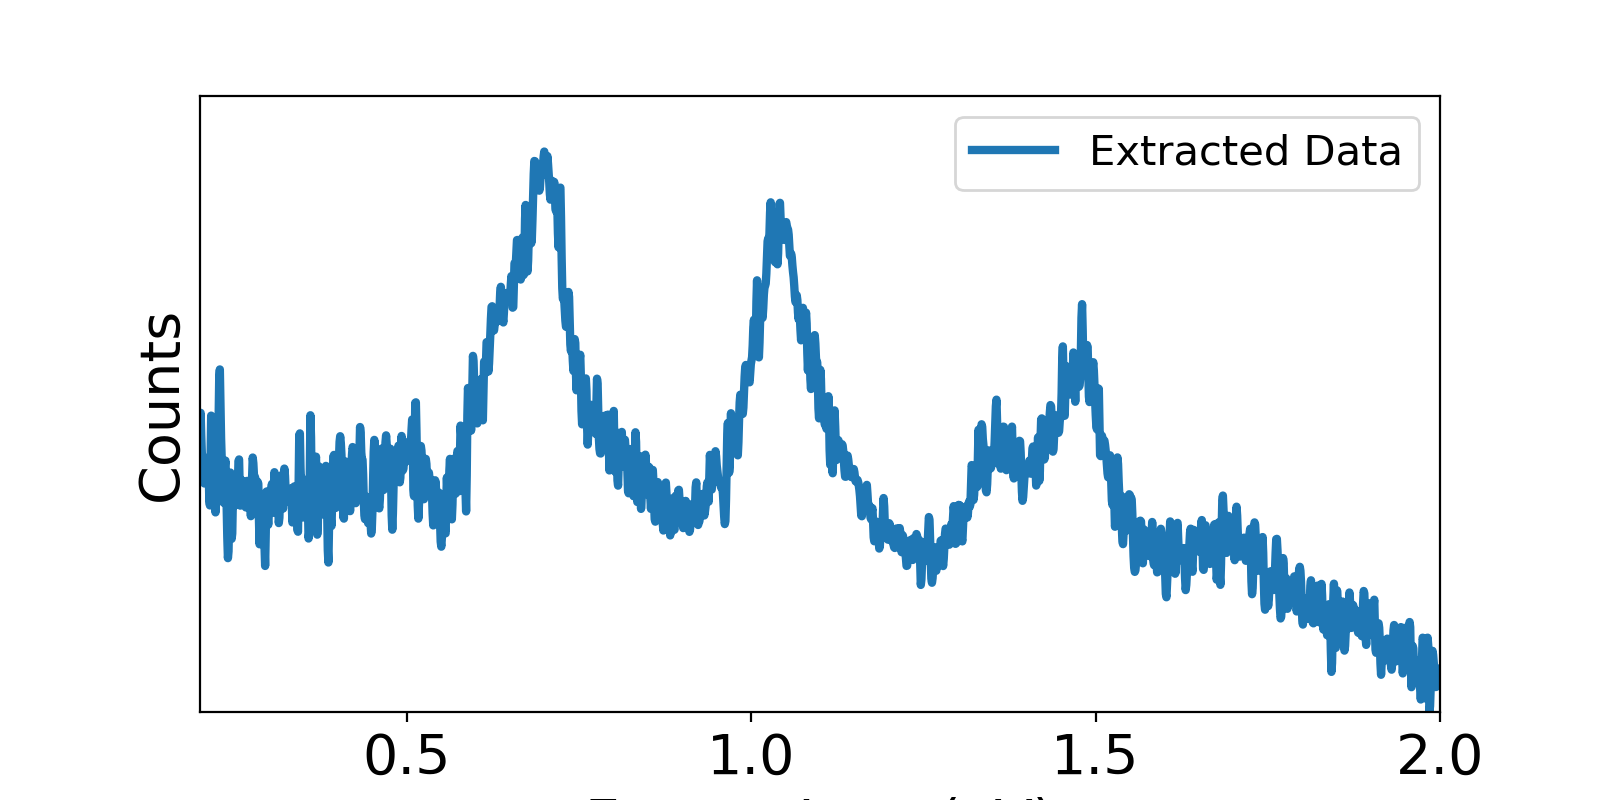

In [6]:
# Example Task 3: set parameters, align raw data and substrate data, subtracted substrate data from raw data, 
#                 test the validation, and plot data
# Validation test can be performed by comparing the shifts of peaks before and after subtraction.

# set range to display and colors of lines
figsize = (8,4)
xrange = [0.2, 2]
prop_cycle = plt.rcParams['axes.prop_cycle'] # default colors
colors = prop_cycle.by_key()['color']
sel_list = [7]
new_data = [new_data_list[i] for i in sel_list]
label_list = ['Raw']
yshift_list = [0] # [0] * len(data_list)
color_list = colors[:len(new_data)]

config = {'xrange' : xrange,
          'yshift_list' : yshift_list,
          'label_list' : label_list,
          'color_list' : color_list,
          'legend_fontsize' : 15
         }

config_find_peak = {'distance': 1 / 100,
                  'prominence': 10 / 100,
                  'display_peaks': False,
                  }
reload(pe)
linefigure = pe.Lines()
linefigure.set_initial_elements([pe.Line(data, label_list[i]) for i, data in enumerate(new_data)])
linefigure.find_peak(xrange, config_find_peak)
new_sub = [pe.Line(new_data_list[6], 'Background')]
linefigure.subtract(new_sub, xrange, display_sub=True)
print('After subtraction:')
config_find_peak['display_peaks'] = True
linefigure.find_peak(xrange, config_find_peak)
config['label_list'] = ['Extracted Data']
linefigure.make_plot(config)
# Save
# plt.savefig(name+'.png', bbox_inches='tight')